# X4 Image to Image Translation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import h5py as h5
import torch as th

In [2]:
path = '/mnt/data/datascience_miniprojects/04_ImageToImage/sim/'
path_inputs = path + 'projected_thickness/'
path_targets = path + 'phase_contrast/'

In [3]:
from PIL import Image
from glob import glob
from torch.utils.data import Dataset
import torchvision.transforms as T

class Img2ImgDataset(Dataset):
    def __init__(self, input_path, target_path):
        # Get sorted lists of file paths
        self.input_files = sorted(glob(os.path.join(input_path, '*.tif')))
        self.target_files = sorted(glob(os.path.join(target_path, '*.tif')))
        
        # Verify matching number of files
        assert len(self.input_files) == len(self.target_files), \
            "Number of input and target images must match"
            
        # Define transforms
        self.transform = T.Compose([
            T.ToTensor(),  # Convert PIL image to tensor and scale to [0,1]
        ])
        
    def __len__(self):
        return len(self.input_files)
    
    def __getitem__(self, idx):
        # Load images
        input_img = Image.open(self.input_files[idx])
        target_img = Image.open(self.target_files[idx])
        
        # Convert to tensors
        input_tensor = self.transform(input_img)
        target_tensor = self.transform(target_img)
        
        return input_tensor, target_tensor

# Create dataset
dataset = Img2ImgDataset(path_inputs, path_targets)

# Print dataset size
print(f"Dataset contains {len(dataset)} image pairs")

# Load first pair to verify shapes
x, y = dataset[0]
print(f"Input shape: {x.shape}")
print(f"Target shape: {y.shape}")


Dataset contains 1844 image pairs
Input shape: torch.Size([1, 1024, 1024])
Target shape: torch.Size([1, 1024, 1024])

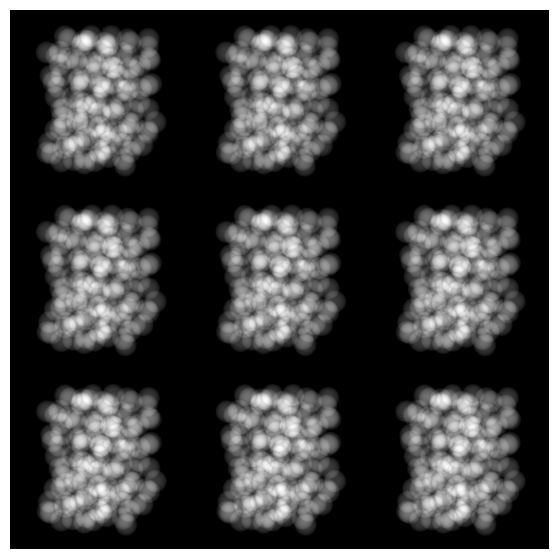

In [6]:
import torchvision
# Create a 3x3 grid of input images
inputs = []
for i in range(9):
    x, _ = dataset[i]  # Get just the input image
    inputs.append(x)

# Use torchvision's make_grid to create a grid of images
grid = torchvision.utils.make_grid(inputs, nrow=3, padding=2)

# Convert to numpy and scale to 0-255 range for display
grid_np = (grid.squeeze().numpy() * 255).astype(np.uint8)

# Plot the grid using matplotlib
plt.figure(figsize=(7,7))
plt.imshow(grid_np.transpose(1,2,0))  # Transpose from (C,H,W) to (H,W,C) for matplotlib
plt.axis('off')
plt.show()